Deteksi Kecurangan Asuransi

Nama: Yehezkiel Satya Nugroho
NIM: 71220832

Algoritma: Decision Tree (Forecasting)
Ujian Akhir Semester Genap 2023/2024 - Kecerdasan Buatan
Dosen: Matahari Bhakti Nendya, S.Kom., M.T

Kasus: Deteksi Kecurangan Asuransi

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
file_path = '[Dataset]_(Asuransi).csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Data Preprocessing
Pada tahap ini, data yang mentah diolah untuk membuatnya siap digunakan dalam model pembelajaran mesin. Langkah-langkah meliputi memeriksa dan menangani nilai yang hilang serta mengubah variabel kategori menjadi numerik.

- df.isnull().sum(): Memeriksa jumlah nilai yang hilang di setiap kolom dataset.
- df.dropna(subset=['fraud_reported']): Menghapus baris yang tidak memiliki nilai pada kolom target (fraud_reported).
- pd.get_dummies(df, drop_first=True): Mengubah variabel kategori menjadi variabel dummy (numerik) dengan menggunakan one-hot encoding, menghindari       perangkap dummy dengan drop_first=True.
- df.head(): Menampilkan beberapa baris pertama dari dataframe yang sudah diproses untuk memastikan praproses data berjalan dengan baik


In [51]:
df.isnull().sum()

Unnamed: 0                                0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 69, dtype: int64

In [52]:
df.isnull().sum()
df = df.dropna(subset=['fraud_reported'])
df = pd.get_dummies(df, drop_first=True)
df.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Split Data
Memisahkan data menjadi set pelatihan dan pengujian.
- X = df.drop('fraud_reported', axis=1): Memisahkan fitur dari target variabel.
- y = df['fraud_reported']: Menetapkan target variabel.
- train_test_split(X, y, test_size=0.2, random_state=42): Memisahkan data menjadi set pelatihan dan pengujian dengan rasio 80:20.
- random_state digunakan untuk memastikan hasil yang konsisten

In [53]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 68), (200, 68), (800,), (200,))

### Train the Model
Pada tahap ini, kita mencari kombinasi hyperparameter terbaik untuk model Decision Tree menggunakan GridSearchCV.
- GridSearchCV: Teknik untuk mencari kombinasi hyperparameter terbaik dengan cross-validation.
- param_grid: Kamus yang berisi parameter dan nilai yang akan dicoba oleh GridSearchCV.
- grid_search.fit(X_train, y_train): Melatih model dengan berbagai kombinasi hyperparameter dan memilih yang terbaik.
- best_model = grid_search.best_estimator_: Model terbaik dengan kombinasi hyperparameter terbaik.
- y_pred = best_model.predict(X_test): Membuat prediksi pada set pengujian.


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

conf_matrix, accuracy, precision, recall

(array([[119,  26],
        [ 11,  44]], dtype=int64),
 0.815,
 0.6285714285714286,
 0.8)

### Evaluation
Evaluasi model menggunakan Confusion Matrix, Accuracy, Precision, dan Recall.
- conf_matrix = confusion_matrix(y_test, y_pred): Membuat confusion matrix untuk melihat kinerja model dalam memprediksi kelas.
- sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues'): Menampilkan confusion matrix sebagai peta panas untuk visualisasi yang lebih mudah.
- accuracy_score(y_test, y_pred): Menghitung akurasi model.
- precision_score(y_test, y_pred): Menghitung presisi model.
- recall_score(y_test, y_pred): Menghitung recall model.

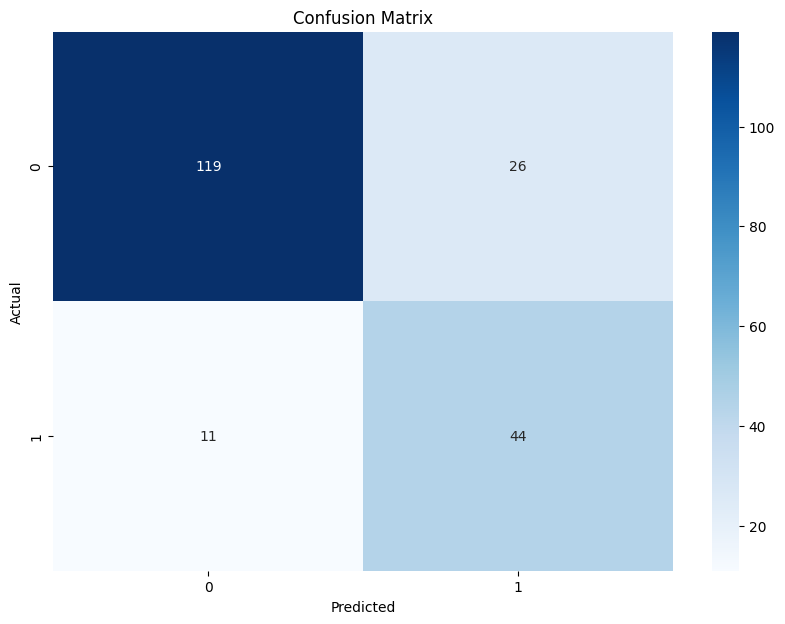

Accuracy: 0.815
Precision: 0.6285714285714286
Recall: 0.8


In [55]:
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')